In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
train_data = pd.read_csv("drive/MyDrive/Colab Notebooks/Titanic Project/train.csv")
test_data = pd.read_csv("drive/MyDrive/Colab Notebooks/Titanic Project/test.csv")

In [ ]:
mean_age = train_data.Age.mean()
train_data.Age = train_data.Age.fillna(mean_age)
train_data.Cabin = train_data.Cabin.fillna('unknown')
train_data.Embarked = train_data.Embarked.fillna('unknown')
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
mean_age = test_data.Age.mean()
test_data.Age = test_data.Age.fillna(mean_age)
mean_age = test_data.Fare.mean()
test_data.Fare = test_data.Fare.fillna(mean_age)
test_data.Cabin = test_data.Cabin.fillna('unknown')
test_data.Embarked = test_data.Embarked.fillna('unknown')
test_data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
train_data = train_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
submission = pd.DataFrame(test_data.PassengerId)

test_data = test_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [ ]:
label_encoder = preprocessing.LabelEncoder()

train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

train_data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [ ]:
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


In [ ]:
y = train_data.Survived
X = train_data.iloc[:,1:]

for column in X.columns:
  max = X[column].max()
  min = X[column].min()
  X[column] = (X[column] - min) / (max - min) # Min-Max Normalization

X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.271174,0.125,0.0,0.014151,0.666667
1,0.0,0.0,0.472229,0.125,0.0,0.139136,0.000000
2,1.0,0.0,0.321438,0.000,0.0,0.015469,0.666667
3,0.0,0.0,0.434531,0.125,0.0,0.103644,0.666667
4,1.0,1.0,0.434531,0.000,0.0,0.015713,0.666667


In [ ]:
for column in test_data.columns:
  max = test_data[column].max()
  min = test_data[column].min()
  test_data[column] = (test_data[column] - min) / (max - min) # Min-Max Normalization

test_data.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0


In [ ]:
X_train, X_validation, y_train, y_validation = train_test_split(
    X, y, test_size = 0.2, random_state = 13
)

input_size = 7
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dropout(.75),
    tf.keras.layers.Dense(128, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dropout(.1),
    tf.keras.layers.Dense(64, activation="relu", kernel_initializer=tf.keras.initializers.HeNormal()),
    tf.keras.layers.Dense(output_size, activation='tanh', kernel_initializer=tf.keras.initializers.GlorotNormal())
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
NUM_EPOCHS = 60
record = model.fit(X_train, y_train, epochs = NUM_EPOCHS, batch_size = 32, 
          validation_data=(X_validation, y_validation), verbose=2)

Epoch 1/60
23/23 - 3s - loss: 2.4553 - accuracy: 0.5407 - val_loss: 1.5591 - val_accuracy: 0.7933 - 3s/epoch - 146ms/step
Epoch 2/60
23/23 - 0s - loss: 2.2248 - accuracy: 0.6559 - val_loss: 1.5338 - val_accuracy: 0.8045 - 176ms/epoch - 8ms/step
Epoch 3/60
23/23 - 0s - loss: 2.4220 - accuracy: 0.7037 - val_loss: 1.5312 - val_accuracy: 0.7765 - 204ms/epoch - 9ms/step
Epoch 4/60
23/23 - 0s - loss: 2.1494 - accuracy: 0.7346 - val_loss: 1.5364 - val_accuracy: 0.7933 - 131ms/epoch - 6ms/step
Epoch 5/60
23/23 - 0s - loss: 2.3104 - accuracy: 0.7317 - val_loss: 1.6348 - val_accuracy: 0.7709 - 145ms/epoch - 6ms/step
Epoch 6/60
23/23 - 0s - loss: 2.0494 - accuracy: 0.7289 - val_loss: 1.5358 - val_accuracy: 0.8045 - 187ms/epoch - 8ms/step
Epoch 7/60
23/23 - 0s - loss: 2.0083 - accuracy: 0.6798 - val_loss: 2.4423 - val_accuracy: 0.7709 - 208ms/epoch - 9ms/step
Epoch 8/60
23/23 - 0s - loss: 2.1608 - accuracy: 0.7037 - val_loss: 1.5340 - val_accuracy: 0.7877 - 308ms/epoch - 13ms/step
Epoch 9/60
23/23

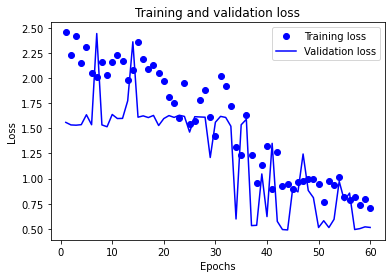

In [ ]:
history_dict = record.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

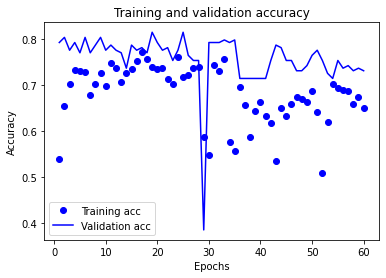

In [ ]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
submission["Survived"] = np.round(model.predict(test_data)).astype(int)
submission.to_csv('drive/MyDrive/Colab Notebooks/Titanic Project/submission.csv', index=False)
submission

14/14 [==============================] - 0s 3ms/step


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
